In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
adult=pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df=pd.DataFrame(data=adult)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hour-per-week      int64
native-country    object
target            object
dtype: object

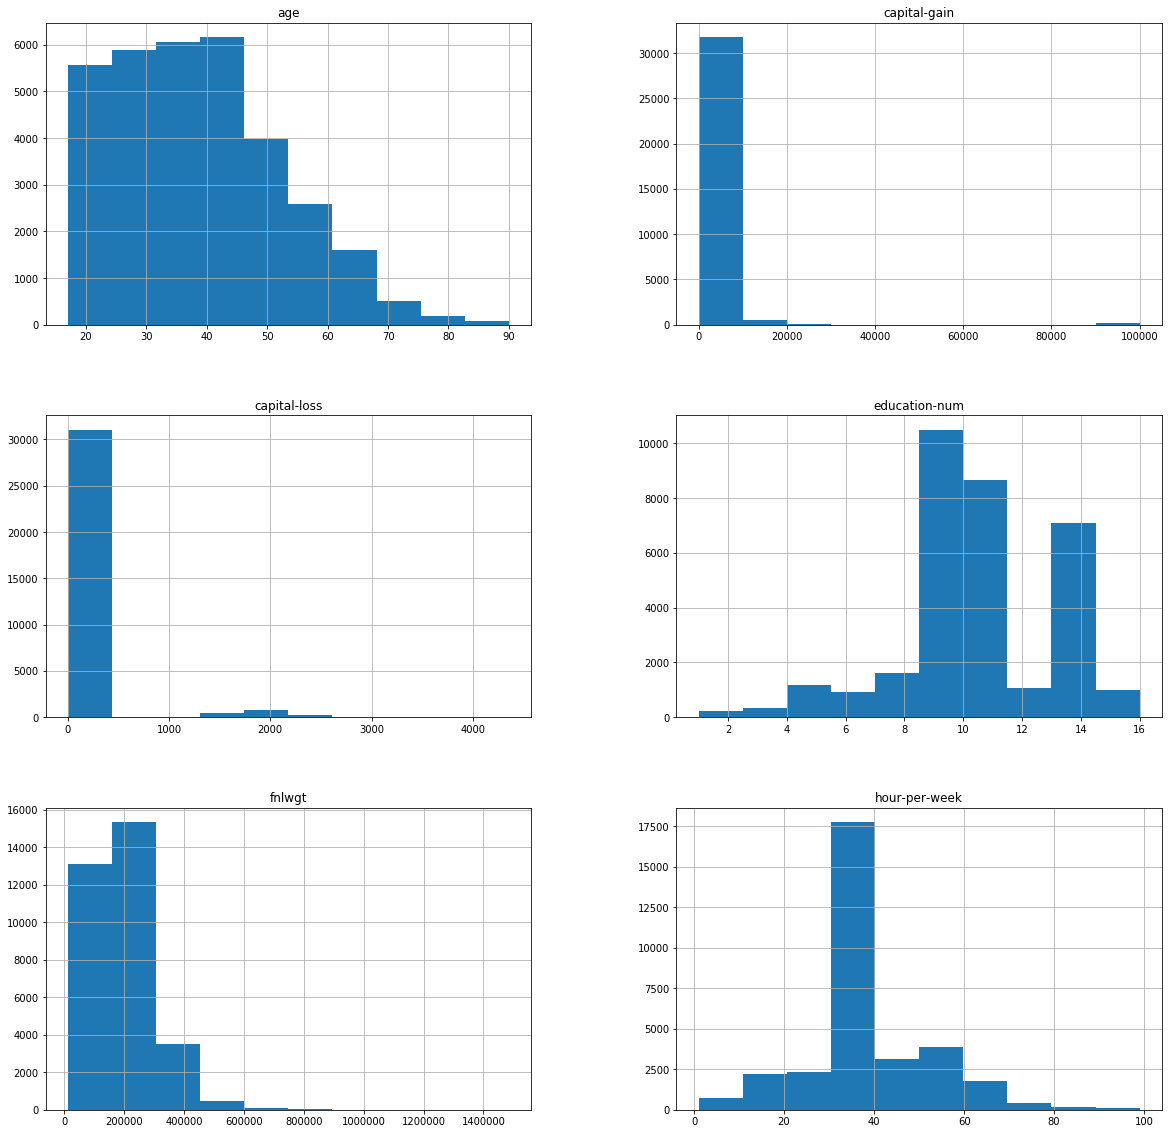

In [6]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26c3a658f88>,
 'caps': [<matplotlib.lines.Line2D at 0x26c3a65eec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c3a6585c8>],
 'medians': [<matplotlib.lines.Line2D at 0x26c3a65ce48>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c3a65cf48>],
 'means': []}

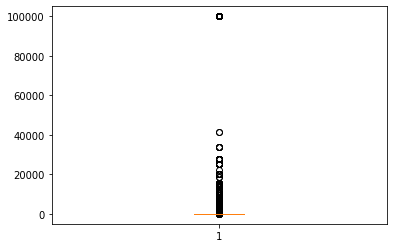

In [7]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26c397fe288>,
 'caps': [<matplotlib.lines.Line2D at 0x26c397fed48>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c397fbd08>],
 'medians': [<matplotlib.lines.Line2D at 0x26c39804608>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c397ee588>],
 'means': []}

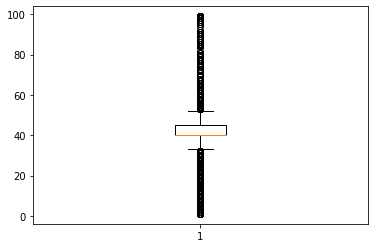

In [8]:
plt.boxplot(df['hour-per-week'])

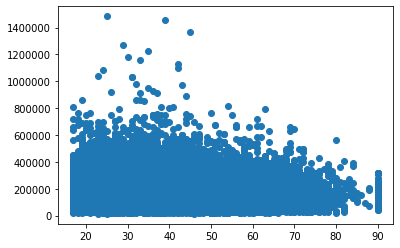

In [9]:
plt.scatter(x='age',y='fnlwgt',data=df)

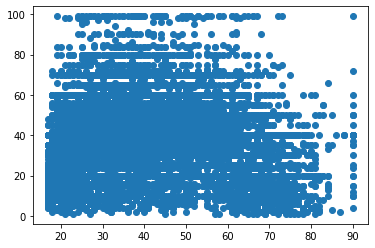

In [10]:
plt.scatter('age','hour-per-week',data=df)

{'bodies': [<matplotlib.collections.PolyCollection at 0x297c326c988>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x297c30b4ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x297c30da048>,
 'cbars': <matplotlib.collections.LineCollection at 0x297c30da308>}

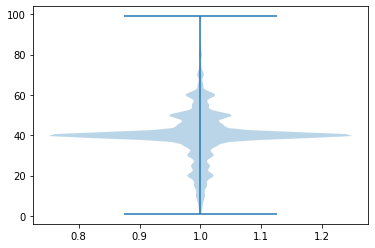

In [11]:
plt.violinplot(df['hour-per-week'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x297c3184f88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x297c3184e48>,
 'cmins': <matplotlib.collections.LineCollection at 0x297c326fec8>,
 'cbars': <matplotlib.collections.LineCollection at 0x297c326ffc8>}

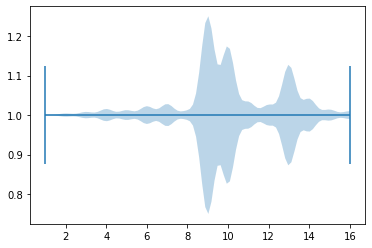

In [12]:
plt.violinplot(df['education-num'],vert=False)

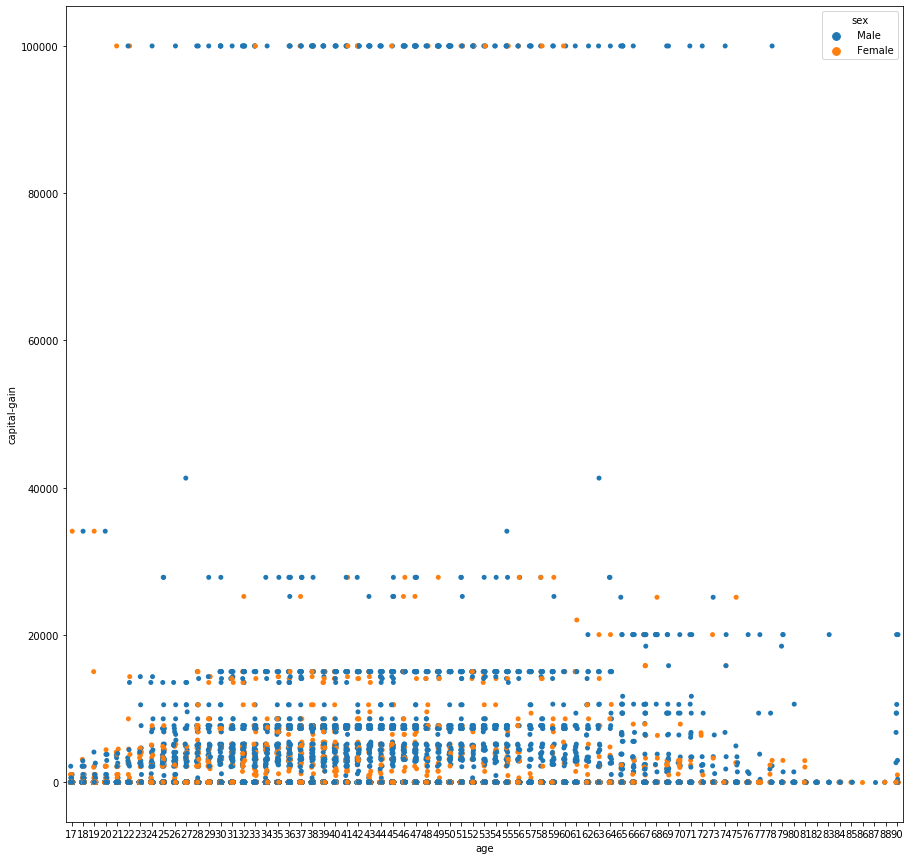

In [13]:
plt.figure(figsize=(15,15))
sns.stripplot('age','capital-gain',hue='sex',data=df)

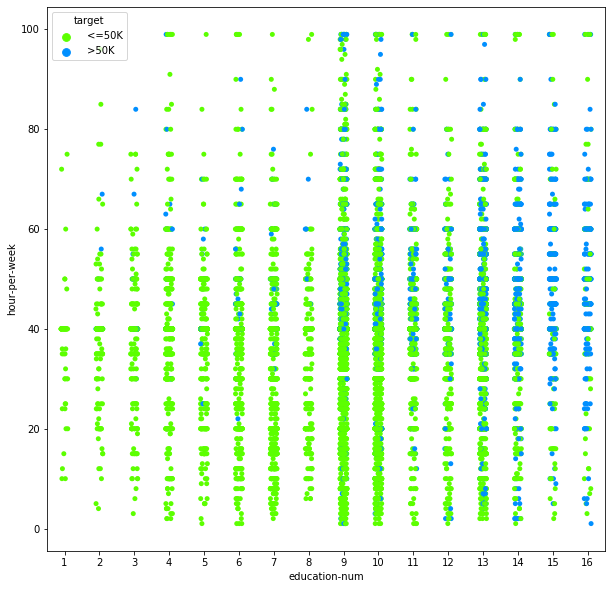

In [14]:
plt.figure(figsize=(10,10))
sns.stripplot('education-num','hour-per-week',hue='target',data=df,palette='gist_rainbow')

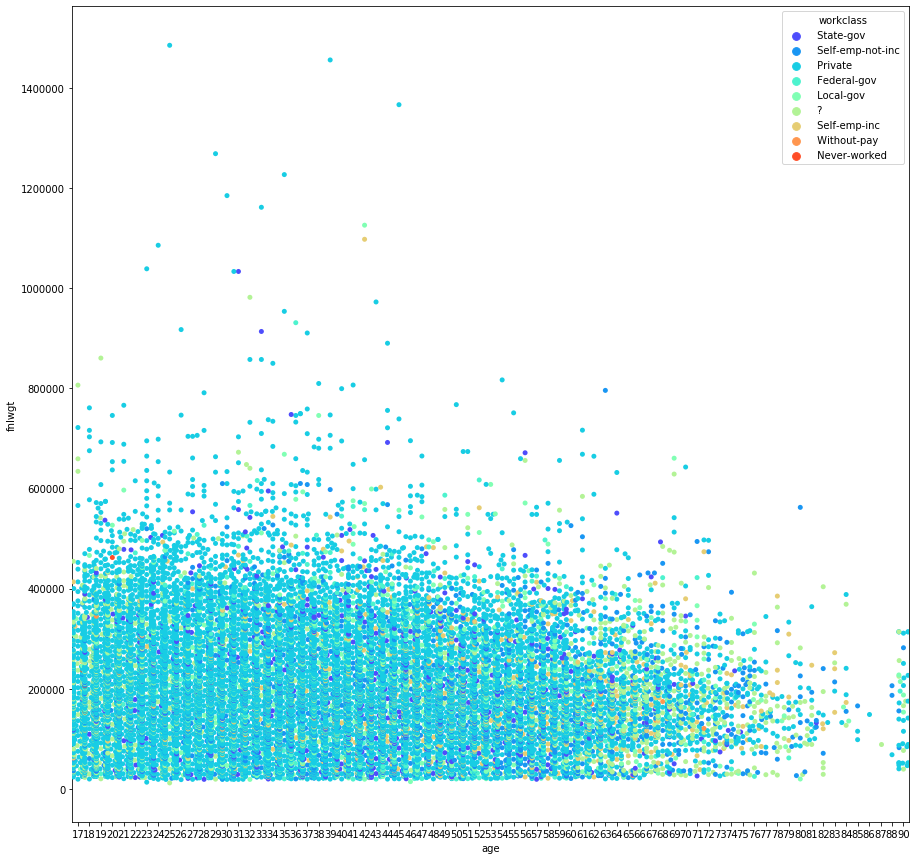

In [7]:
plt.figure(figsize=(15,15))
sns.swarmplot('age','fnlwgt',hue='workclass',data=df,color='y',palette='rainbow')

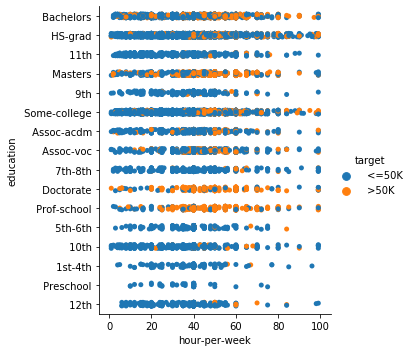

In [11]:
sns.catplot('hour-per-week','education',hue='target',data=df)

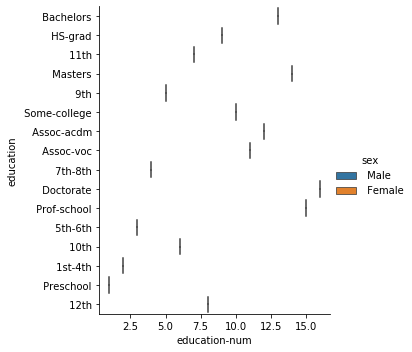

In [15]:
sns.catplot('education-num','education',hue='sex',data=df,kind='violin')

<Figure size 360x360 with 0 Axes>

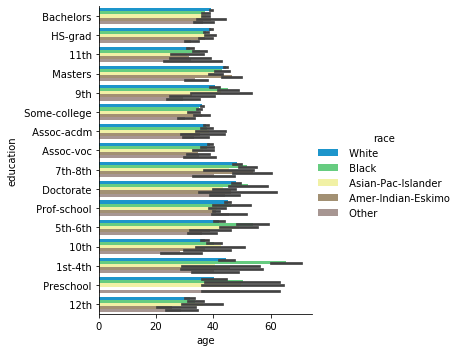

In [16]:
plt.figure(figsize=(5,5))
sns.catplot('age','education',hue='race',data=df,kind='bar',palette='terrain')

<Figure size 720x720 with 0 Axes>

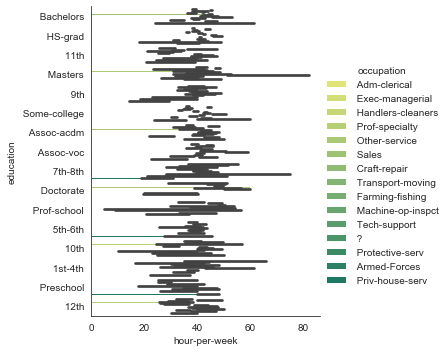

In [17]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.catplot('hour-per-week','education',hue='occupation',data=df,kind='bar',palette='summer_r')

<Figure size 720x720 with 0 Axes>

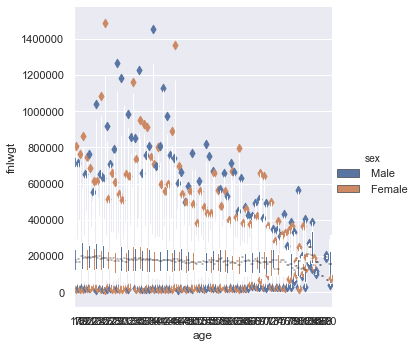

In [24]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.catplot('age','fnlwgt',hue='sex',data=df,kind='boxen')

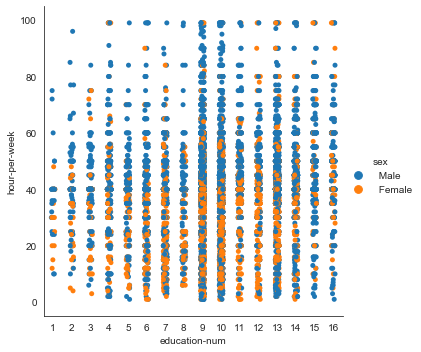

In [18]:
sns.catplot('education-num','hour-per-week',hue='sex',data=df,kind='strip')

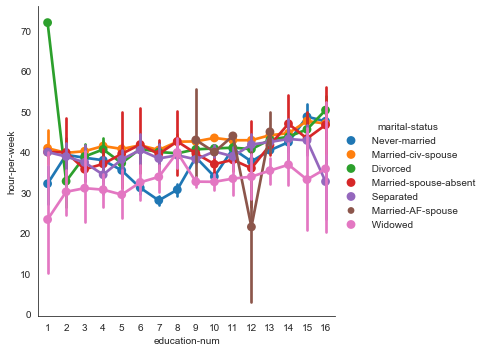

In [19]:
sns.catplot('education-num','hour-per-week',hue='marital-status',data=df,kind='point')

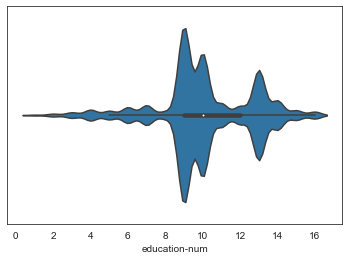

In [20]:
sns.violinplot(df['education-num'])

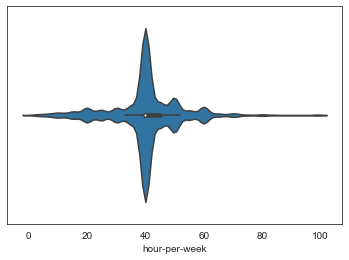

In [21]:
sns.violinplot(df['hour-per-week'])

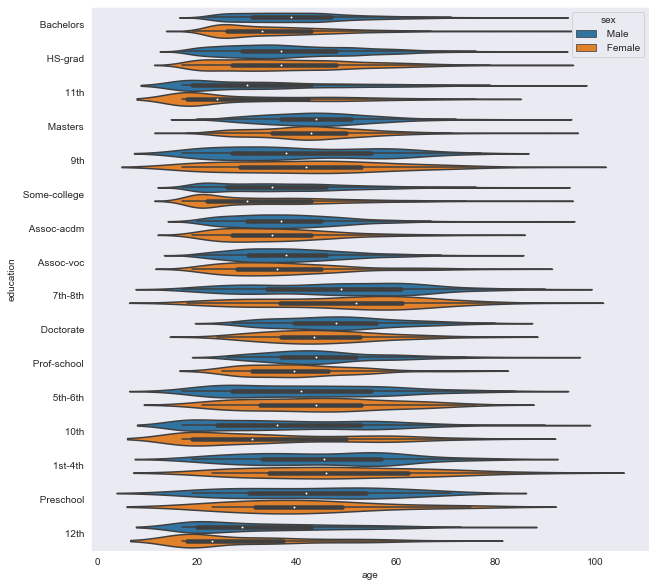

In [22]:
plt.figure(figsize=(10,10))
sns.set_style('dark')
sns.violinplot('age','education',hue='sex',data=df)

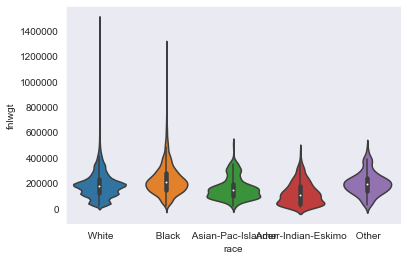

In [23]:
sns.violinplot('race','fnlwgt',data=df)

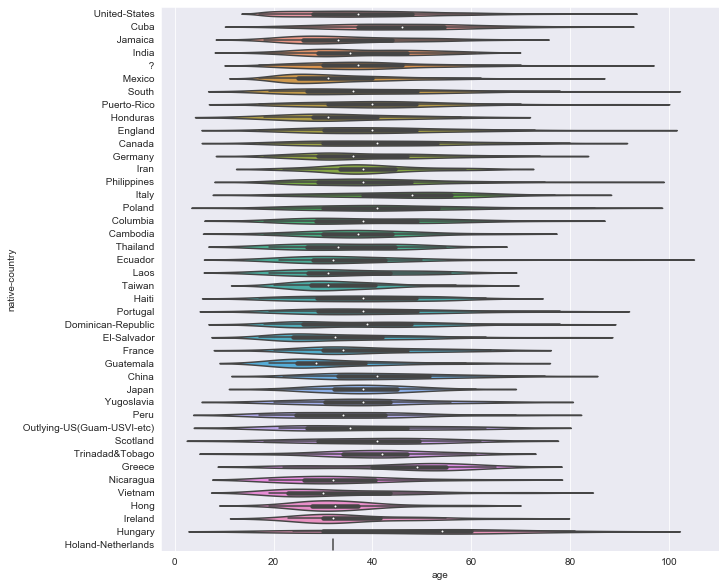

In [24]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.violinplot('age','native-country',data=df)

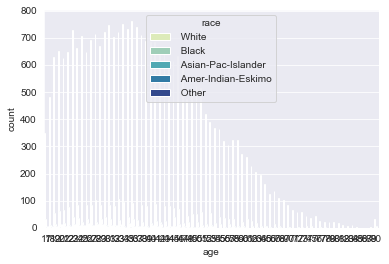

In [25]:
sns.countplot('age',hue='race',data=df,palette='YlGnBu')

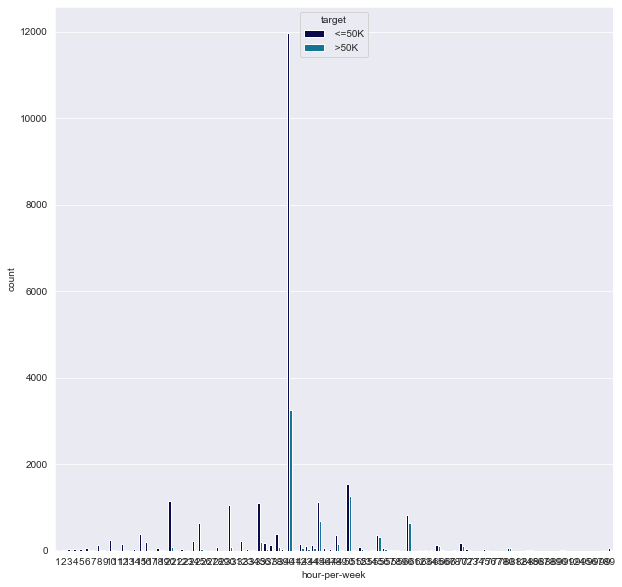

In [26]:
plt.figure(figsize=(10,10))
sns.countplot('hour-per-week',hue='target',data=df,palette='ocean')

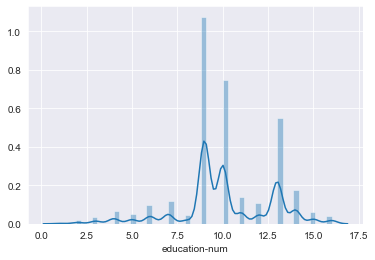

In [27]:
sns.distplot(df['education-num'])

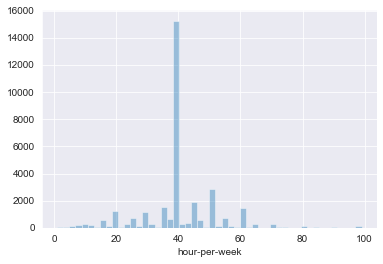

In [28]:
sns.distplot(df['hour-per-week'],kde=False)

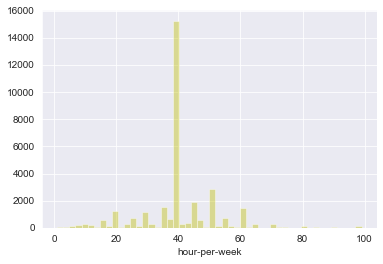

In [29]:
sns.distplot(df['hour-per-week'],kde=False,color='y')

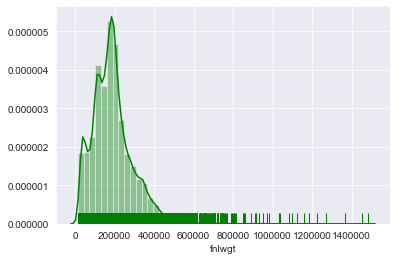

In [30]:
sns.distplot(df['fnlwgt'],rug=True,color='g')

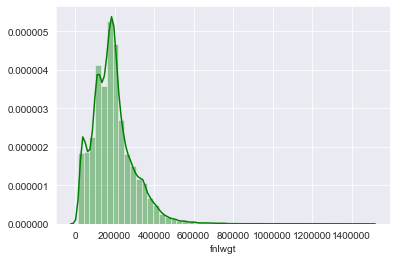

In [31]:
sns.distplot(df['fnlwgt'],color='g')

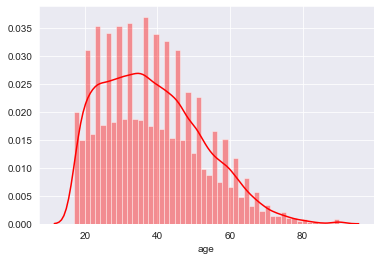

In [32]:
sns.distplot(df['age'],color='r')

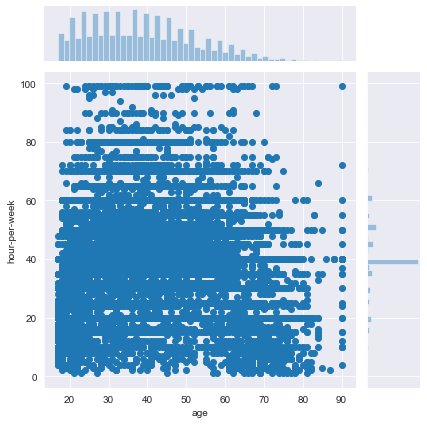

In [33]:
sns.jointplot('age','hour-per-week',data=df,kind='scatter')

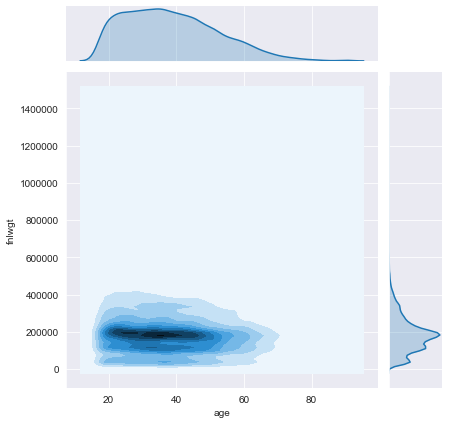

In [34]:
sns.jointplot('age','fnlwgt',data=df,kind='kde')

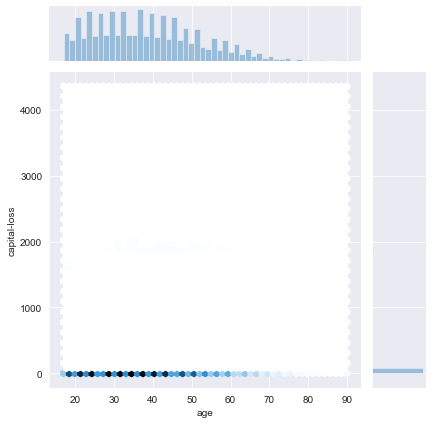

In [35]:
sns.jointplot('age','capital-loss',data=df,kind='hex')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hour-per-week     32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df['target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hour-per-week     0
native-country    0
target            0
dtype: int64

In [11]:
work=pd.get_dummies(df['workclass'],drop_first=True,prefix='workclass')
edu=pd.get_dummies(df['education'],drop_first=True,prefix='education')
marital=pd.get_dummies(df['marital-status'],drop_first=True,prefix='marital-status')
occu=pd.get_dummies(df['occupation'],drop_first=True,prefix='occupation')
relation=pd.get_dummies(df['relationship'],drop_first=True,prefix='relationship')
race=pd.get_dummies(df['race'],drop_first=True,prefix='race')
sex=pd.get_dummies(df['sex'],drop_first=True,prefix='sex')
coun=pd.get_dummies(df['native-country'],drop_first=True,prefix='native-country')

In [12]:
df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)

In [13]:
for i in [work,edu,marital,occu,relation,race,sex,coun]:
    df=pd.concat([df,i],axis=1)

In [14]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x=df.drop('target',axis=1)
print(x.shape)
x.head()

(32561, 100)


,age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y=df['target']
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: target, Length: 32561, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [20]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),MultinomialNB()]

In [ ]:
max_acc_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accu_values=accuracy_score(y_test,predm)
        print('Accuracy score corresponing to random state',r_state,'is:',accu_values)
        if accu_values>max_acc_score:
            max_acc_score=accu_values
            final_state=r_state
            final_model=m
print()
print()
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_acc_score,'and models is',final_model)

Accuracy score corresponing to random state 40 is: 0.7921944977607166
Accuracy score corresponing to random state 40 is: 0.8426103646833013
Accuracy score corresponing to random state 40 is: 0.8143314139475368
Accuracy score corresponing to random state 40 is: 0.7713371721049265
Accuracy score corresponing to random state 40 is: 0.7516314779270633
Accuracy score corresponing to random state 40 is: 0.7746641074856047
Accuracy score corresponing to random state 41 is: 0.7968010236724248
Accuracy score corresponing to random state 41 is: 0.8436340371081253
Accuracy score corresponing to random state 41 is: 0.8034548944337812
Accuracy score corresponing to random state 41 is: 0.7657069737683941


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
rn=RandomForestClassifier()

In [29]:
score=cross_val_score(rn,x,y,cv=10,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.841572   0.85288698 0.85012285 0.83722359 0.8507371  0.84920147
 0.85227273 0.84735872 0.85780098 0.85042998]
0.8489606396806273
0.005533333282804624


In [30]:
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.7984366275823562
[[5271  169]
 [1275  449]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5440
           1       0.73      0.26      0.38      1724

    accuracy                           0.80      7164
   macro avg       0.77      0.61      0.63      7164
weighted avg       0.79      0.80      0.76      7164



In [31]:
rn.fit(x_train,y_train)
rn.score(x_train,y_train)
predrn=rn.predict(x_test)
print(accuracy_score(y_test,predrn))
print(confusion_matrix(y_test,predrn))
print(classification_report(y_test,predrn))

0.846175321049693
[[5064  376]
 [ 726  998]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5440
           1       0.73      0.58      0.64      1724

    accuracy                           0.85      7164
   macro avg       0.80      0.75      0.77      7164
weighted avg       0.84      0.85      0.84      7164



In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.21057762, 0.23349704, 0.241048  , ..., 0.25004775, 0.2580673 ,
       0.23251043])

In [34]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [35]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99944853, 0.99944853,
       1.        ])

In [36]:
tpr

array([0.00000000e+00, 5.80046404e-04, 1.74013921e-03, ...,
       9.98839907e-01, 1.00000000e+00, 1.00000000e+00])

In [37]:
threshold

array([2.        , 1.        , 1.        , ..., 0.02477051, 0.02322603,
       0.00657168])

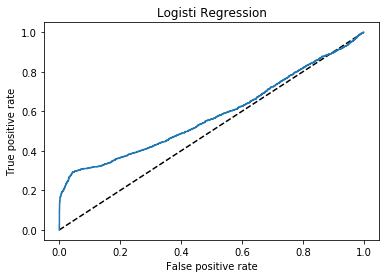

In [38]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logisti Regression')
plt.show()

In [39]:
y_pred_prob=rn.predict_proba(x_test)[:,1]
y_pred_prob

array([1. , 0. , 0.9, ..., 0. , 0.8, 0.2])

In [40]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

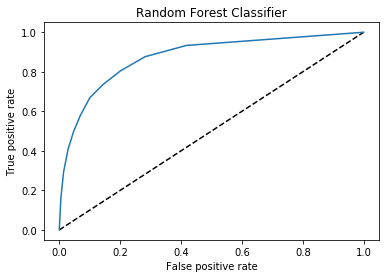

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

In [51]:
para_grid={'criterion':('gini','entropy'),'n_estimators':[20,40,80,100]}
rs=RandomForestClassifier()
grid=GridSearchCV(estimator=rs,param_grid=para_grid)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [53]:
rfs=RandomForestClassifier(criterion='entropy',n_estimators=80)
rfs.fit(x_train,y_train)
rfs.score(x_train,y_train)
predrfs=rfs.predict(x_test)
print(accuracy_score(y_test,predrfs))
print(confusion_matrix(y_test,predrfs))
print(classification_report(y_test,predrfs))

0.8588777219430486
[[5071  369]
 [ 642 1082]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5440
           1       0.75      0.63      0.68      1724

    accuracy                           0.86      7164
   macro avg       0.82      0.78      0.80      7164
weighted avg       0.85      0.86      0.85      7164



In [56]:
para_grid={'criterion':('gini','entropy'),'splitter':('best','random'),'random_state':[0,5,10]}
dtc=DecisionTreeClassifier()
grid=GridSearchCV(estimator=dtc,param_grid=para_grid)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'random_state': [0, 5, 10],
                   

In [58]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=10,splitter='best')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8181183696259073
[[4796  644]
 [ 659 1065]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5440
           1       0.62      0.62      0.62      1724

    accuracy                           0.82      7164
   macro avg       0.75      0.75      0.75      7164
weighted avg       0.82      0.82      0.82      7164



In [158]:
from sklearn.externals import joblib

In [159]:
joblib.dump(rn,'adultfile.obj')

['adultfile.obj']